In [14]:
import pandas as pd
import re
import seaborn as sns

In [9]:
station_df = pd.read_csv('132/station.csv', sep= '\t')

In [10]:
station_df

,QoS,code,latitude,revision,longitude,station
0,good,JP,36.00000,2020-11-25,139.55722,Okegawa
1,excellent,IN,11.93381,"05/24/2021, 00:00:00",79.82979,Puducherry
2,maintenance,DE,52.21099,2022-05-10,7.02238,Gronau
3,excellent,CN,41.09822,2018-01-23,120.74792,Nanpiao
4,good,US,33.54428,08 Jun 2024,-84.23381,Stockbridge
...,...,...,...,...,...,...
698,good,IE,53.53333,"05/17/2022, 00:00:00",-7.35000,An Muileann gCearr
699,good,US,45.53929,"01/25/2024, 00:00:00",-122.38731,Troutdale
700,excellent,IN,17.34769,2024-01-27,78.55757,Lal Bahadur Nagar
701,acceptable,NG,6.45407,2018-09-14,3.39467,Lagos


In [28]:
station_df.describe() # prob useless

,latitude,longitude
count,703.000000,703.000000
mean,28.699220,16.946846
std,24.406067,70.122555
min,-44.396720,-156.474320
25%,14.354040,-14.410810
50%,36.650000,13.321270
75%,47.432685,71.552920
max,65.848110,171.253640


In [12]:
station_df.shape

(703, 6)

In [13]:
station_df.columns


Index(['QoS', 'code', 'latitude', 'revision', 'longitude', 'station'], dtype='object')

In [18]:
station_df.isna().sum()

QoS          0
code         2
latitude     0
revision     0
longitude    0
station      0
dtype: int64

In [23]:
station_df[station_df['code'].isna() == True]

,QoS,code,latitude,revision,longitude,station
274,maintenance,NaN,-21.98333,"02/23/2016, 00:00:00",16.91667,Okahandja
318,good,NaN,-21.98333,06 Dec 2021,16.91667,Okahandja


<Axes: xlabel='QoS', ylabel='Count'>

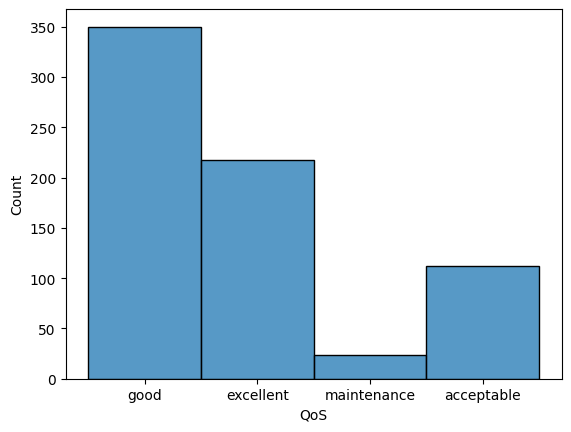

In [25]:
sns.histplot(station_df['QoS'])

In [26]:
station_df['code'].unique()


array(['JP', 'IN', 'DE', 'CN', 'US', 'PH', 'RU', 'AZ', 'ES', 'AU', 'BE',
       'TN', 'NL', 'GB', 'BD', 'CD', 'BR', 'PK', 'MX', 'ZA', 'CZ', 'ID',
       'CA', 'DZ', 'LY', 'FR', 'CI', 'TR', 'BG', 'HK', 'GE', 'IL', 'LK',
       'PR', 'IT', 'SE', 'CM', 'CL', 'MM', 'TZ', 'MA', 'UA', 'FI', 'BW',
       'LR', 'VN', 'AR', 'NG', 'TT', 'AO', 'PT', 'BY', 'KR', 'NZ', 'UG',
       'KE', 'IR', 'CH', 'CO', 'KZ', 'SV', 'MN', 'MK', 'VE', 'MG', nan,
       'DJ', 'CF', 'TH', 'ET', 'PL', 'PE', 'PS', 'EG', 'DO', 'HR', 'BJ',
       'MY', 'RO', 'AM', 'HT', 'VU', 'SY', 'MZ', 'RW', 'PG', 'GD', 'SL',
       'NI', 'IE', 'NE', 'UZ', 'TD', 'EC', 'DK', 'CU', 'GH', 'AF', 'AT'],
      dtype=object)

In [33]:
station_df['code'].value_counts()

code
US    94
IN    51
RU    50
DE    41
BR    36
      ..
HK     1
CF     1
CH     1
KZ     1
AT     1
Name: count, Length: 98, dtype: int64

In [27]:
station_df['station'].unique()


array(['Okegawa', 'Puducherry', 'Gronau', 'Nanpiao', 'Stockbridge',
       'Guyong', 'Shushary', 'Qazax', 'Verl', 'Leioa', 'Zhukovka',
       'Wheelers Hill', 'Beveren', 'Ueno-ebisumachi', 'Bretten',
       'Beni Khiar', 'Oldenzaal', 'Gainsborough', 'Danjiangkou',
       'Zhoucun', 'Porterville', 'Izluchinsk', 'Weimar', 'Shimotoda',
       'Yingkou', 'Manikchari', 'Kasangulu', 'Caldas Novas', 'Viradouro',
       'Bhit Shah', 'Lesosibirsk', 'Contla', 'Hutchinson', 'Yablonovskiy',
       'Standerton', 'Glendale', 'Plzeň', 'Kediri', 'Sydney', 'Lancing',
       'Cheraga', 'Saharsa', 'Barneveld', 'Newbury', 'Pucheng',
       'Kot Addu', 'Ghat', 'Searcy', 'Manjeri', 'Talence', 'Lakota',
       'Griffith', 'Heyuan', 'Serinhisar', 'Annaka', 'Solntsevo',
       'Pekanbaru', 'Jackson', 'Smolyan', 'Tsuen Wan', 'Yonkers',
       'Herblay', 'Buri', 'Danilov', 'Kobuleti', 'Rahat', 'Shinshiro',
       'Morningside Heights', 'Greenfield', 'Bavly',
       'Nikolayevsk-on-Amure', 'Dehiwala-Mount Lavinia

In [34]:
station_df.duplicated().sum()


np.int64(0)